# 決定木から始める機械学習

## 演習課題


### 例題1：毒キノコ

``data``フォルダの``agaricus-lepiota.data``ファイルは，[University California, IrvineのMachine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Mushroom)で公開されている「（毒）キノコ」データセットです．

下記コードを実行して，データを読み込み，データに決定木アルゴリズムを適用して，毒キノコの予測モデルを構築してください．その上で，構築した予測モデルの予測性能を評価してください．また，どんな特徴量が毒キノコ分類に有用かを分析してください．

In [21]:
mushroom_df <- read.table("data/mushroom/agaricus-lepiota.data",
                          header=F, sep=",", stringsAsFactors=T)
target_cols <- c(
    "is_poisonous", 
    "cap_shape", 
    "cap_surface", 
    "cap_color", 
    "bruises", 
    "odor", 
    "gill_attachment", 
    "gill_spacing", 
    "gill_size", 
    "gill_color", 
    "stalk_shape", 
    "stalk_root", 
    "stalk_surface_above_ring", 
    "stalk_surface_below_ring", 
    "stalk_color_above_ring", 
    "stalk_color_below_ring", 
    "veil_type", 
    "veil_color", 
    "ring_number", 
    "ring_type", 
    "spore_print_color", 
    "population", 
    "habitat"
)
colnames(mushroom_df) <- target_cols

# veil_typeは使用しないでよい列なので空にしておく
mushroom_df$veil_type <- NULL

なお，このファイルには8124種類のキノコのデータが納められています．各行はある種のキノコの情報が納められており，あるキノコが毒キノコであるか（class列）を含め，23つの特徴量（列）が記されています．

本データの23の特徴量の概要は以下の通りです：
* is_poisonous: キノコが毒キノコ（p）か無毒キノコ（e）か
* cap_shape: カサの形．b=ベル型，c=円錐型，x=凸型，f=平型，k=こぶ型，s=陥没型
* cap_surface: カサの表面．f=繊維状，g=溝がついている，y=うろこに覆われている，s=なめらか
* cap_color: カサの色．n=茶色，b=黄褐色，c=シナモン色，g=灰色，r=緑色，p=ピンク色，u=紫色，e=赤色，w=白色，y=黄色
* bruises: アザがあるか．t=yes，f=no
* odor: 匂い．a=アーモンド，c=防腐剤，y=魚，f=腐敗，m=かび臭い，n=臭いなし，p=刺激臭，s=スパイシー
* gill_attachment: ひだ．a=取り付けられたような感じ？，d=たれ下がっている，f=自由な感じ？，n=刻み目のある
* gill_spacing: ひだの間隔．c=狭い，w=ほぼ密集している，d=広い
* gill_size:ひだの大きさ．b=大きい，n=小さい
* gill_color: ひだの色．k=黒色，n=茶色，b=黄褐色，c=シナモン色，g=灰色，r=緑色，o=オレンジ色，p=ピンク色，u=紫色，e=赤色，w=白色，y=黄色
* stalk_shape: 柄の形．e=末広がり，t=先細り
* stalk_root: 柄の根元．b=球根状の，c=棍棒状，cup=カップ状，e=まっすぐ，z=網目状の根のような，r=根っこ状
* stalk_surface_above_ring: 円座より上の柄の形状．f=繊維状，y=うろこに覆われている，k=シルク状，s=なめらか
* stalk_surface_below_ring: 円座より下の柄の形状．f=繊維状，y=うろこに覆われている，k=シルク状，s=なめらか
* stalk_color_above_ring: 円座より上の柄の色．n=茶色，b=黄褐色，c=シナモン色，g=灰色，o=オレンジ色，p=ピンク色，e=赤色，w=白色，y=黄色
* stalk_color_below_ring: 円座より下の柄の色．n=茶色，b=黄褐色，c=シナモン色，g=灰色，o=オレンジ色，p=ピンク色，e=赤色，w=白色，y=黄色
* veil_color: 被膜の色．b=茶色，o=オレンジ色，w=白色，y=黄色
* ring_number: 円座の数．o=1つ，t=2つ，n=なし
* ring_type: 円座の種類．c=蜘蛛の巣状，e=はかない感じの，f=裾広がり，l=大きい，n=なし，p=ペンダント状，s=ぴったりと覆われている，z=帯状
* spore_pring_color: 胞子紋の色．k=黒色，n=茶色，b=黄褐色，h=チョコレート色，r=緑色，o=オレンジ色，u=紫色，w=白色，y=黄色
* population: 生え方．a=大量，c=群集，n=多数，s=散在，v=ぽつぽつ，y=端正
* habitat: 生息地．g=草の上，l=葉の上，m=低湿地，p=道，u=都会，w=廃物，d=木

In [22]:
# 最初の数件を表示
head(mushroom_df)

is_poisonous,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,⋯,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
p,x,s,n,t,p,f,c,n,k,⋯,s,s,w,w,w,o,p,k,s,u
e,x,s,y,t,a,f,c,b,k,⋯,s,s,w,w,w,o,p,n,n,g
e,b,s,w,t,l,f,c,b,n,⋯,s,s,w,w,w,o,p,n,n,m
p,x,y,w,t,p,f,c,n,n,⋯,s,s,w,w,w,o,p,k,s,u
e,x,s,g,f,n,f,w,b,k,⋯,s,s,w,w,w,o,e,n,a,g
e,x,y,y,t,a,f,c,b,n,⋯,s,s,w,w,w,o,p,k,n,g


In [23]:
# データを学習用（80%）と評価用（20%）に分割する
mushroom_df.index <- createDataPartition(mushroom_df$is_poisonous, p=0.80, list=F)
mushroom_train_df <- mushroom_df[mushroom_df.index, ]
mushroom_test_df <- mushroom_df[-mushroom_df.index, ]

In [24]:
# 第1引数は，毒キノコ判定（class）をそれ以外のすべての特徴量を使って分類するよう学習する，ということを意味します
# 第2引数には，学習に用いるためのデータを指定します
# 第3引数は，決定木アルゴリズムを用いるよう指定します
mushroom_model <- train(is_poisonous ~ ., data=mushroom_train_df,
                        method = "rpart2")

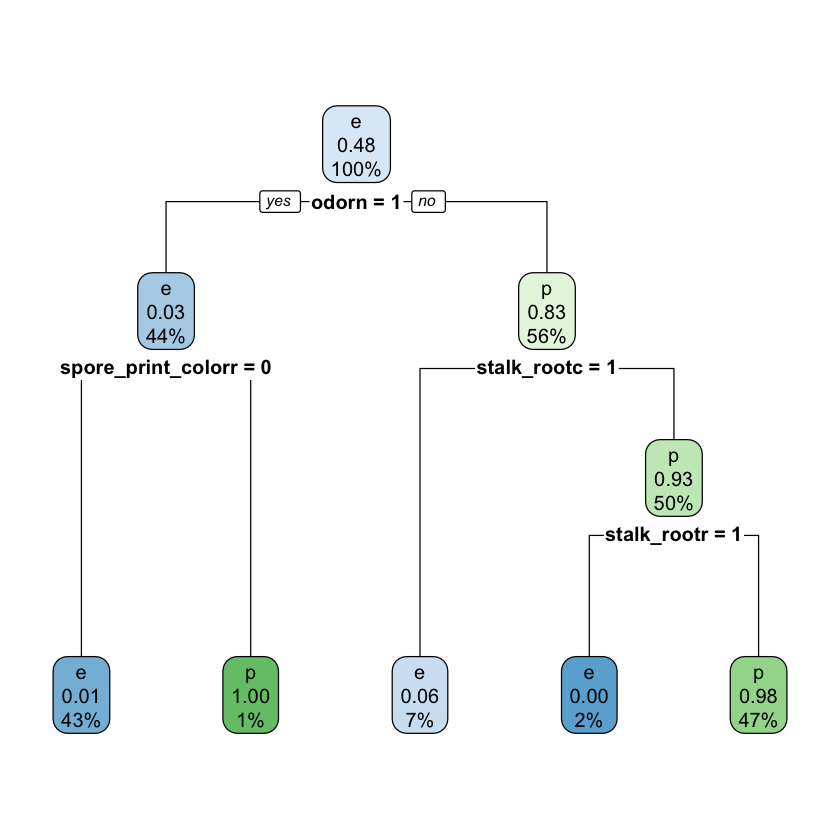

In [25]:
# 可視化
rpart.plot(mushroom_model$finalModel)

In [26]:
# 予測モデルを評価データに適用
mushroom_predicted <- predict(mushroom_model, mushroom_test_df)

# 予測性能を分析
confusionMatrix(
    mushroom_predicted,
    mushroom_test_df$is_poisonous
)

Confusion Matrix and Statistics

          Reference
Prediction   e   p
         e 816  18
         p  25 765
                                          
               Accuracy : 0.9735          
                 95% CI : (0.9645, 0.9808)
    No Information Rate : 0.5179          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.947           
                                          
 Mcnemar's Test P-Value : 0.3602          
                                          
            Sensitivity : 0.9703          
            Specificity : 0.9770          
         Pos Pred Value : 0.9784          
         Neg Pred Value : 0.9684          
             Prevalence : 0.5179          
         Detection Rate : 0.5025          
   Detection Prevalence : 0.5135          
      Balanced Accuracy : 0.9736          
                                          
       'Positive' Class : e               
                              

In [27]:
# 予測に重要となる特徴量の分析
varImp(mushroom_model)

rpart2 variable importance

  only 20 most important variables shown (out of 95)

                          Overall
odorn                     100.000
ring_typep                 74.142
odorf                      62.779
stalk_surface_above_ringk  57.145
stalk_surface_below_ringk  53.289
odorl                      34.162
bruisest                   32.450
stalk_rootc                28.142
stalk_surface_below_ringy  15.860
populationn                14.653
stalk_rootr                13.732
spore_print_colorr          5.179
habitatm                    2.611
cap_colory                  1.860
gill_colorr                 1.673
habitatu                    0.000
cap_surfaces                0.000
gill_colorh                 0.000
cap_shapek                  0.000
cap_surfacey                0.000

### 課題2

``data/wine``フォルダには[University California, IrvineのMachine Learning RepositoryのWine Quality Data Set](http://archive.ics.uci.edu/ml/datasets/Wine+Quality)にて公開されている
* 各行に白ワインの特徴と品質のデータが記録された``winequality-white.csv``ファイル
* 各行に赤ワインの特徴と品質のデータが記録された``winequality-red.csv``ファイル

が納められています．これらデータに決定木アルゴリズムを適用して，赤ワイン・白ワインの品質予測モデルを構築してください．その上で，どんな特徴量が赤ワイン・白ワインの品質に有用かを分析してください．

``ヒント1`` データの読み込み方法は以下の通りです．

In [28]:
red_wine_df <- read.table("data/wine/winequality-red.csv", header=T, sep=",")
white_wine_df <- read.table("data/wine/winequality-white.csv", header=T, sep=",")

``ヒント2`` データ中に記録されているワインの特徴量（列）の詳細は以下の通りです（引用：[ヒトの直感的理解は単変量モデルまで、直感を超えたければ多変量モデルへ](https://tjo.hatenablog.com/entry/2015/11/26/190000)）：
* fixed acidity：酒石酸濃度
* volatile acidity：酢酸濃度
* citric acid：クエン酸濃度
* residual sugar：残糖濃度
* chlorides：塩化ナトリウム濃度
* free sulfur dioxide：遊離SO2濃度
* total sulfur dioxide：総SO2濃度
* density：密度
* pH：pH
* sulphates：硫化カリウム濃度
* alcohol：アルコール度数
* quality：テイスティングスコア（今回予測したいワイン品質値）



In [29]:
head(red_wine_df)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [30]:
# 赤ワインデータを学習データ80%と評価データ20%に分割
red_wine_df.index <- createDataPartition(red_wine_df$quality, p=0.80, list=F)
red_wine_train_df <- red_wine_df[red_wine_df.index, ]
red_wine_test_df <- red_wine_df[-red_wine_df.index, ]

# 白ワインデータを学習データ80%と評価データ20%に分割
white_wine_df.index <- createDataPartition(white_wine_df$quality, p=0.80, list=F)
white_wine_train_df <- white_wine_df[white_wine_df.index, ]
white_wine_test_df <- white_wine_df[-white_wine_df.index, ]

In [31]:
# 第1引数は，毒キノコ判定（class）をそれ以外のすべての特徴量を使って分類するよう学習する，ということを意味します
# 第2引数には，学習に用いるためのデータを指定します
# 第3引数は，決定木アルゴリズムを用いるよう指定します
red_wine_model <- train(quality ~ ., data=red_wine_train_df,
                        method = "rpart2")

white_wine_model <- train(quality ~ ., data=white_wine_train_df,
                        method = "rpart2")

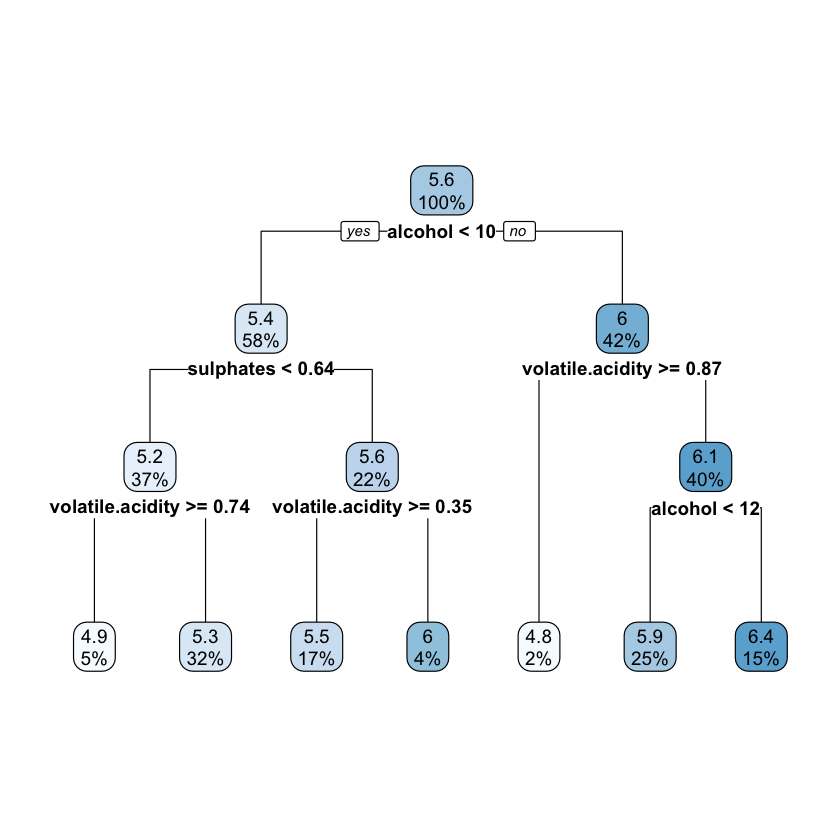

In [32]:
# 赤ワインのみ可視化
rpart.plot(red_wine_model$finalModel)

In [33]:
# 予測に重要となる特徴量の分析（赤ワイン）
varImp(red_wine_model)

rpart2 variable importance

                     Overall
volatile.acidity      100.00
alcohol                98.66
sulphates              82.70
citric.acid            42.13
total.sulfur.dioxide   25.91
fixed.acidity          23.19
pH                     20.05
chlorides              14.09
density                12.46
residual.sugar          0.00
free.sulfur.dioxide     0.00

In [34]:
# 予測に重要となる特徴量の分析（白ワイン）
varImp(white_wine_model)

rpart2 variable importance

                     Overall
alcohol              100.000
free.sulfur.dioxide   60.731
density               51.152
volatile.acidity      44.544
total.sulfur.dioxide  33.477
chlorides             29.235
citric.acid           17.328
fixed.acidity         16.054
pH                     8.345
residual.sugar         0.000
sulphates              0.000

### 課題4

課題3のワインの品質予測問題について，「データ解析技術」の1日目に学習した「（線形）重回帰分析」用いて，予測モデルを構築してください．さらに，重回帰分析を用いた予測モデルと決定木を用いた予測モデルの予測性能を比較してください．

``ヒント`` 今回の予測問題は**連続する値を予測する「回帰」問題**です．そのため，予測性能の評価には以下の``calc_mae``関数を用いてください．なお，MAE（平均絶対誤差）は，**「予測された数値」と「実際の数値の差」の絶対値の平均**を表し，MAE値が小さいほど予測の誤差が小さいことを意味します．

#### MAEの定義

In [35]:
# 関数calc_maeの定義（何も考えずに，まず以下のコードを走らせてください）
calc_mae <- function(predicted_vals, test_vals) {
    data_num <- length(predicted_vals)
    mae <- sum(abs(predicted_vals - test_vals)) / data_num
    return(mae)
}

In [36]:
# 赤ワインの実際の品質スコアが入ったリストを評価用に準備
red_wine_real <- red_wine_test_df$quality

#### 重回帰分析の実行と性能評価

In [37]:
# 線形重回帰分析
red_wine_model_with_lm <- lm(quality ~ ., data=red_wine_train_df)

# （必要なら）変数選択
#red_wine_model_with_lm <- step(red_wine_model_with_lm)

In [38]:
# 予測モデルを評価データに適用
red_wine_predicted_with_lm <- predict(red_wine_model_with_lm, red_wine_test_df)

# 平均絶対誤差（MAE） の計算
calc_mae(red_wine_predicted_with_lm, red_wine_real)

[1] 0.5147463

#### 決定木による予測と性能評価

In [39]:
# 予測モデルを評価データに適用
red_wine_predicted <- predict(red_wine_model, red_wine_test_df)

# 予測性能を分析
calc_mae(red_wine_predicted, red_wine_real)

[1] 0.550618

#### ランダムフォレストによる予測と性能評価

In [40]:
red_wine_model_with_rf <- train(
    quality ~ ., 
    data=red_wine_train_df, 
    method = "ranger", 
    preProcess = c('center', 'scale')
)

In [41]:
# 予測モデルを評価データに適用
red_wine_predicted_with_rf <- predict(red_wine_model_with_rf, red_wine_test_df)

# 予測性能を分析
calc_mae(red_wine_predicted_with_rf, red_wine_real)

[1] 0.432707